# 2.8 Gradient Bendit Algorithm

In [1]:
import numpy as np
import os
from tqdm import tqdm_notebook

np.random.seed(77)

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams["figure.figsize"] = (11,4)

plt.rcParams['axes.unicode_minus'] = False

PROJECT_ROOT_DIR = "."
CHAPTER_ID = '10_armed_testbed'

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
def get_reward(action):
    return np.random.normal(q_rewards[action],1)

def cap_1(selected_action, action):
    if selected_action == action:
        return 1
    else:
        return 0
    
def argmax(array):
    top_index = [0]
    top = array[0]
    
    for i in range(1,len(array)):
        if array[i] > top:
            top_index = [i]
            top = array[i]
        elif array[i] == top:
            top_index.append(i)
        
    np.random.shuffle(top_index)
        
    return top_index[0]

In [11]:
## Gradient Bandit Algorithms
STEP = 1000
RUN = 2000
NUM_OF_ACTION = 10

q_rewards = []
for _ in range(NUM_OF_ACTION):
    tmp = np.random.normal(4,1)
    q_rewards.append(tmp)
    
optimal_action = np.argmax(q_rewards)

GB01_OPTIMAL_ACTIONS = [0]*STEP
GB01_OPTIMAL_ACTIONS_NoBase = [0]*STEP
GB04_OPTIMAL_ACTIONS = [0]*STEP
GB04_OPTIMAL_ACTIONS_NoBase = [0]*STEP

## 10-armed testbed
for i in tqdm_notebook(range(RUN)):

    # α=0.1
    H = [0]*NUM_OF_ACTION
    average_reward = 4
    step_size = 0.1
    is_baseline = True
    
    for t in range(STEP):
        A = argmax(H)
        R = get_reward(A)

        if is_baseline == True:
            average_reward = (average_reward*(t+1)+R)/(t+2)

        for a in range(NUM_OF_ACTION):
            H[a] = H[a] + step_size*(R-average_reward)*(cap_1(A,a) - np.exp(H[a])/np.sum(np.exp(H)))

        if A == optimal_action:
            GB01_OPTIMAL_ACTIONS[t] += 1/RUN*100
            
    # α=0.1, withdout baseline
    H = [0]*NUM_OF_ACTION
    average_reward = 4
    step_size = 0.1
    is_baseline = False
    
    for t in range(STEP):
        A = argmax(H)
        R = get_reward(A)

        if is_baseline == True:
            average_reward = (average_reward*(t+1)+R)/(t+2)

        for a in range(NUM_OF_ACTION):
            H[a] = H[a] + step_size*(R-average_reward)*(cap_1(A,a) - np.exp(H[a])/np.sum(np.exp(H)))

        if A == optimal_action:
            GB01_OPTIMAL_ACTIONS_NoBase[t] += 1/RUN*100
            
            
#     # α=0.4
#     H = [0]*NUM_OF_ACTION
#     average_reward = 4
#     step_size = 0.4
#     is_baseline = True
    
#     for t in range(STEP):
#         A = argmax(H)
#         R = get_reward(A)

#         if is_baseline == True:
#             average_reward = (average_reward*(t+1)+R)/(t+2)

#         for a in range(NUM_OF_ACTION):
#             H[a] = H[a] + step_size*(R-average_reward)*(cap_1(A,a) - np.exp(H[a])/np.sum(np.exp(H)))

#         if A == optimal_action:
#             GB04_OPTIMAL_ACTIONS[t] += 1/RUN*100
            
            
#     # α=0.4, without baseline
#     H = [0]*NUM_OF_ACTION
#     average_reward = 4
#     step_size = 0.4
#     is_baseline = False
    
#     for t in range(STEP):
#         A = argmax(H)
#         R = get_reward(A)

#         if is_baseline == True:
#             average_reward = (average_reward*(t+1)+R)/(t+2)

#         for a in range(NUM_OF_ACTION):
#             H[a] = H[a] + step_size*(R-average_reward)*(cap_1(A,a) - np.exp(H[a])/np.sum(np.exp(H)))

#         if A == optimal_action:
#             GB04_OPTIMAL_ACTIONS_NoBase[t] += 1/RUN*100

KeyboardInterrupt: 

In [10]:
## Gradient Bandit Algorithms
STEP = 200
RUN = 2000
NUM_OF_ACTION = 10

q_rewards = []
for _ in range(NUM_OF_ACTION):
    tmp = np.random.normal(4,1)
    q_rewards.append(tmp)
    
optimal_action = np.argmax(q_rewards)

# α=0.1
H = [0]*NUM_OF_ACTION
average_reward = 4
step_size = 0.1
is_baseline = False

print("optimal action :", optimal_action)
print(H)

for t in range(STEP):
    A = argmax(H)
    R = get_reward(A)
    
    if is_baseline == True:
        average_reward = (average_reward*(t+1)+R)/(t+2)
    
    for a in range(NUM_OF_ACTION):
        H[a] = H[a] + step_size*(R-average_reward)*(cap_1(A,a) - np.exp(H[a])/np.sum(np.exp(H)))
    
    print("action:",A, ", reward:", R, ", baseline: ", average_reward, ",R-baseline: ", (R-average_reward),  "\n", H,"\n")
       
    

optimal action : 9
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
action: 0 , reward: 5.023005408246989 , baseline:  4 ,R-baseline:  1.0230054082469886 
 [0.09207048674222898, -0.010132335705097575, -0.010142462832768916, -0.010152620325474057, -0.010162808335126824, -0.010173027014706631, -0.0101832765182681, -0.01019355700095079, -0.010203868618989049, -0.010214211529721955] 

action: 0 , reward: 1.204239760253674 , baseline:  4 ,R-baseline:  -2.795760239746326 
 [-0.1568680300227982, 0.01821316050724108, 0.01812036032011772, 0.018028250514505822, 0.017936820479530675, 0.017846059814653634, 0.01775595832419301, 0.01766650601201694, 0.017577693076401796, 0.017489509905050236] 

action: 1 , reward: 4.739993415226507 , baseline:  4 ,R-baseline:  0.7399934152265066 
 [-0.1631829503879916, 0.08468522257883834, 0.01064603528904955, 0.010548988517816708, 0.010452605738222626, 0.010356876571920831, 0.010261790843906798, 0.010167338577243881, 0.010073509987953706, 0.00998029548006514] 

action: 1 , reward: 5

 [-0.3536184431477797, 2.0629326349623343, -0.2010552816453084, -0.20139872014720633, -0.2017426524568306, -0.20208709648057882, -0.20243207006884906, -0.20277759102253154, -0.20312367709940704, -0.20347034602045702] 

action: 1 , reward: 5.745877962294385 , baseline:  4 ,R-baseline:  1.7458779622943847 
 [-0.3617333543926607, 2.1465413074744264, -0.21010019036750055, -0.21044474281052178, -0.2107897857686296, -0.21113533698201264, -0.21148141413513374, -0.21182803486316404, -0.21217521675832435, -0.21252297737613918] 

action: 1 , reward: 5.778488318294606 , baseline:  4 ,R-baseline:  1.778488318294606 
 [-0.36960892808928153, 2.2276151937103297, -0.21886564079810059, -0.21921094417305495, -0.2195567344720984, -0.21990302927591956, -0.22024984610978302, -0.22059720244990785, -0.22094511572975464, -0.2212936033462255] 

action: 1 , reward: 7.343772234575726 , baseline:  4 ,R-baseline:  3.3437722345757264 
 [-0.38370771546605004, 2.3725844239165776, -0.2339361950063243, -0.2342864584495

action: 1 , reward: 5.710020430498796 , baseline:  4 ,R-baseline:  1.7100204304987958 
 [-0.46287633439827197, 3.183198269699148, -0.3219799585342173, -0.32231794951997694, -0.32265638534027147, -0.322995281851774, -0.3233346548608273, -0.32367452012920395, -0.32401489337978007, -0.3243557903021349] 

action: 1 , reward: 5.809266783107018 , baseline:  4 ,R-baseline:  1.8092667831070184 
 [-0.46660497777592785, 3.221217705243554, -0.32614559186884373, -0.326482573740264, -0.3268199986456908, -0.32715788237692484, -0.3274962406757009, -0.3278350892394238, -0.328174443726819, -0.32851431976350887] 

action: 1 , reward: 6.518435341333996 , baseline:  4 ,R-baseline:  2.518435341333996 
 [-0.4716264534983038, 3.272394319455658, -0.331692807524024, -0.3320285961661501, -0.3323648253521443, -0.3327015107874418, -0.3330386681277481, -0.33337631298474407, -0.33371446093170476, -0.3340531275090458] 

action: 1 , reward: 6.141534886096133 , baseline:  4 ,R-baseline:  2.1415348860961334 
 [-0.47570

action: 1 , reward: 6.049895610315797 , baseline:  4 ,R-baseline:  2.0498956103157973 
 [-0.5216561740102191, 3.7808751734603434, -0.3875921168950614, -0.387912917993536, -0.38823413791332284, -0.3885557915221581, -0.3888778936415805, -0.389200459052327, -0.38952350249964646, -0.38984703869854626] 

action: 1 , reward: 4.872265659217086 , baseline:  4 ,R-baseline:  0.8722656592170859 
 [-0.5226942885652922, 3.791398047896187, -0.38876823970748914, -0.3890886821996451, -0.38940954311881415, -0.3897308373156813, -0.39005257959480943, -0.39037478472002896, -0.39069746741974504, -0.39102064239217815] 

action: 1 , reward: 5.732807917184458 , baseline:  4 ,R-baseline:  1.7328079171844584 
 [-0.5247357216203697, 3.8120867314482885, -0.3910600938329886, -0.39137987140778085, -0.3917000666038627, -0.3920206942386906, -0.3923417690837432, -0.39266330586989817, -0.3929853192927278, -0.39330782401772724] 

action: 1 , reward: 4.154026959232512 , baseline:  4 ,R-baseline:  0.15402695923251208 
 [-

action: 1 , reward: 4.954637148505435 , baseline:  4 ,R-baseline:  0.9546371485054346 
 [-0.5559991203770956, 4.128368658274786, -0.4260471118852259, -0.42635683029471994, -0.4266669542551852, -0.42697749808586427, -0.42728847606216797, -0.4275999024208679, -0.42791179136520857, -0.42822415706995837] 

action: 1 , reward: 5.10237804826064 , baseline:  4 ,R-baseline:  1.1023780482606398 
 [-0.5569306383480109, 4.137776471234512, -0.4270988158728546, -0.4274082191443622, -0.4277180276286925, -0.4280282556303981, -0.42833891741026425, -0.4286500271904955, -0.4289615991598229, -0.4292736474785491] 

action: 1 , reward: 4.187315562091479 , baseline:  4 ,R-baseline:  0.18731556209147904 
 [-0.5570874324057598, 4.139359945057461, -0.42727708897092137, -0.4275864373950323, -0.42789619097646014, -0.42820636401727147, -0.42851697077577616, -0.4288280254717137, -0.42913954229135914, -0.4294515353925673] 

action: 1 , reward: 5.905751585437036 , baseline:  4 ,R-baseline:  1.9057515854370362 
 [-0.

action: 1 , reward: 5.213755301525996 , baseline:  4 ,R-baseline:  1.213755301525996 
 [-0.5733041260269635, 4.3029800702772905, -0.44547518914209033, -0.4457792167045897, -0.44608364350307644, -0.44638848358765665, -0.44669375096576813, -0.4469994596072717, -0.4473056234494664, -0.447612256402042] 

action: 1 , reward: 5.382427805687167 , baseline:  4 ,R-baseline:  1.3824278056871666 
 [-0.5742830187008182, 4.312847570295762, -0.44657742002264705, -0.4468811222060069, -0.4471852232759057, -0.44748973726733904, -0.44779467817269974, -0.4481000599468633, -0.44840589651219764, -0.4487122017635103] 

action: 1 , reward: 4.55535422352385 , baseline:  4 ,R-baseline:  0.5553542235238504 
 [-0.5746723238221502, 4.316771650970433, -0.4470181464880354, -0.4473217163828043, -0.4476256850272013, -0.4479300664501885, -0.44823487463815176, -0.4485401235399835, -0.4488458270720904, -0.44915199912333853] 

action: 1 , reward: 4.385880960155735 , baseline:  4 ,R-baseline:  0.3858809601557347 
 [-0.574

action: 1 , reward: 5.341082721490957 , baseline:  4 ,R-baseline:  1.3410827214909569 
 [-0.5972011995544182, 4.54356500648485, -0.4722809709511008, -0.47257721000048325, -0.4728738398107722, -0.47317087406900576, -0.4734683264211101, -0.4737662104768575, -0.47406453981474717, -0.4743633279868288] 

action: 1 , reward: 7.338357953047392 , baseline:  4 ,R-baseline:  3.3383579530473924 
 [-0.5990465987530519, 4.562117369372167, -0.4743356008067743, -0.4746312572323932, -0.4749273037670152, -0.4752237540702177, -0.47552062176058224, -0.4758179204206427, -0.47611566360175583, -0.47641386482891523] 

action: 1 , reward: 5.577424575330439 , baseline:  4 ,R-baseline:  1.577424575330439 
 [-0.5999019401379213, 4.570715571455884, -0.4752967069666556, -0.4755920849008788, -0.4758878526468253, -0.4761840238512588, -0.47648061212000176, -0.476777631022879, -0.4770750940985835, -0.47737301485948586] 

action: 1 , reward: 5.5548831746793335 , baseline:  4 ,R-baseline:  1.5548831746793335 
 [-0.60073

action: 1 , reward: 6.375301676687403 , baseline:  4 ,R-baseline:  2.3753016766874033 
 [-0.6148575348164274, 4.720924997576953, -0.492077542482673, -0.49236809793222225, -0.4926590380280253, -0.4929503761950067, -0.4932421258180926, -0.4935343002470718, -0.49382691280138136, -0.49411997677483527] 

action: 1 , reward: 5.934374032583493 , baseline:  4 ,R-baseline:  1.9343740325834933 
 [-0.6157462033689499, 4.72984280498438, -0.4930737942287157, -0.49336406536165384, -0.4936547208360867, -0.4939457740638811, -0.49423723841696077, -0.49452912723216225, -0.4948214538160164, -0.49511423144947153] 

action: 1 , reward: 6.185731826035095 , baseline:  4 ,R-baseline:  2.185731826035095 
 [-0.6167410008646622, 4.739824559462092, -0.49418776708553597, -0.49447772123042744, -0.49476805937551854, -0.49505879491808874, -0.49534994121553594, -0.4956415115902274, -0.49593351933427526, -0.49622597771425503] 

action: 1 , reward: 5.206849003446238 , baseline:  4 ,R-baseline:  1.206849003446238 
 [-0.6

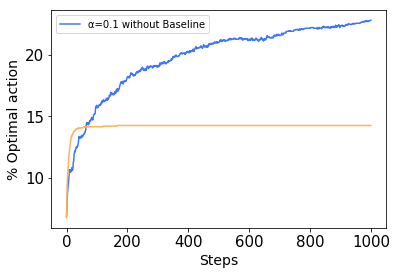

In [12]:
colors = ["#4076ff", "#b3c8ff", "#ffb24d", "#ffddb0"]
plt.plot(np.arange(STEP), GB01_OPTIMAL_ACTIONS, color=colors[0])
plt.legend(["α=0.1"])
# plt.plot(np.arange(STEP), GB04_OPTIMAL_ACTIONS, color=colors[1])
# plt.legend(["α=0.4"])
plt.plot(np.arange(STEP), GB01_OPTIMAL_ACTIONS_NoBase, color=colors[2])
plt.legend(["α=0.1 without Baseline"])
# plt.plot(np.arange(STEP), GB04_OPTIMAL_ACTIONS_NoBase, color=colors[3])
# plt.legend(["α=0.4 without Baseline"])
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
# save_fig("GB_Otimal action")
plt.show()